In [80]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sn

In [81]:
data = pd.read_csv("Heart.csv")

In [82]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [83]:
data = data.drop(columns=["Unnamed: 0"])

In [84]:
data.iloc[:, 0:5]

,Age,Sex,ChestPain,RestBP,Chol
0,63,1,typical,145,233
1,67,1,asymptomatic,160,286
2,67,1,asymptomatic,120,229
3,37,1,nonanginal,130,250
4,41,0,nontypical,130,204
...,...,...,...,...,...
298,45,1,typical,110,264
299,68,1,asymptomatic,144,193
300,57,1,asymptomatic,130,131
301,57,0,nontypical,130,236


In [85]:
data.iloc[:, 9:]

,Oldpeak,Slope,Ca,Thal,AHD
0,2.3,3,0.0,fixed,No
1,1.5,2,3.0,normal,Yes
2,2.6,2,2.0,reversable,Yes
3,3.5,3,0.0,normal,No
4,1.4,1,0.0,normal,No
...,...,...,...,...,...
298,1.2,2,0.0,reversable,Yes
299,3.4,2,2.0,reversable,Yes
300,1.2,2,1.0,reversable,Yes
301,0.0,2,1.0,normal,Yes


In [86]:
# # Age - average, min, max, 
# print("Age average: ", data["Age"].mean())
# print("Age minimum: ", data["Age"].min())
# print("Age maxmimum: ", data["Age"].max())
# print("Age median: ", data["Age"].median())
# print("Age count: ", data["Age"].count())
# print("Age SD: ", data["Age"].std())
# print("Age average: ", data["Age"].mean())

# # Sex - male and female
# print("\nGender count:")
# print("Male (0) and Female (1)")
# print(data["Sex"].value_counts())

data.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [87]:
data.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [88]:
data.info()
data = data.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 33.3+ KB


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        297 non-null    int64  
 1   Sex        297 non-null    int64  
 2   ChestPain  297 non-null    object 
 3   RestBP     297 non-null    int64  
 4   Chol       297 non-null    int64  
 5   Fbs        297 non-null    int64  
 6   RestECG    297 non-null    int64  
 7   MaxHR      297 non-null    int64  
 8   ExAng      297 non-null    int64  
 9   Oldpeak    297 non-null    float64
 10  Slope      297 non-null    int64  
 11  Ca         297 non-null    float64
 12  Thal       297 non-null    object 
 13  AHD        297 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 34.8+ KB


              Age       Sex    RestBP      Chol       Fbs   RestECG     MaxHR  \
Age      1.000000 -0.092399  0.290476  0.202644  0.132062  0.149917 -0.394563   
Sex     -0.092399  1.000000 -0.066340 -0.198089  0.038850  0.033897 -0.060496   
RestBP   0.290476 -0.066340  1.000000  0.131536  0.180860  0.149242 -0.049108   
Chol     0.202644 -0.198089  0.131536  1.000000  0.012708  0.165046 -0.000075   
Fbs      0.132062  0.038850  0.180860  0.012708  1.000000  0.068831 -0.007842   
RestECG  0.149917  0.033897  0.149242  0.165046  0.068831  1.000000 -0.072290   
MaxHR   -0.394563 -0.060496 -0.049108 -0.000075 -0.007842 -0.072290  1.000000   
ExAng    0.096489  0.143581  0.066691  0.059339 -0.000893  0.081874 -0.384368   
Oldpeak  0.197123  0.106567  0.191243  0.038596  0.008311  0.113726 -0.347640   
Slope    0.159405  0.033345  0.121172 -0.009215  0.047819  0.135141 -0.389307   
Ca       0.362210  0.091925  0.097954  0.115945  0.152086  0.129021 -0.268727   

            ExAng   Oldpeak

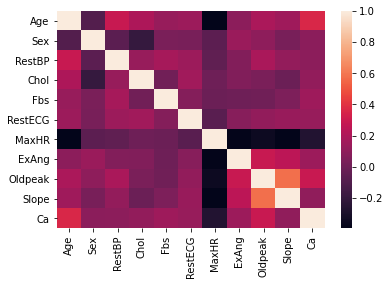

In [93]:
print(data.corr())
dataplot = sn.heatmap(data.corr())
plt.show()